# Loading Data & Processing

## importing pkgs

In [142]:
## importing pkg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow
import sklearn
sns.set()



## Data loading

In [143]:
# ML_DSC_cell
# ====== data loading ====== #
#magic('%reset -sf')

data_files = ['group-a-1.xlsx', 'group-a-2.xlsx', 'group-a-3.xlsx','group-a-4.xlsx',
              'group-b-1.xlsx', 'group-b-2.xlsx', 'group-b-3.xlsx', 'group-b-4.xlsx',
              'group-c-1.xlsx', 'group-c-2.xlsx', 'group-c-3.xlsx', 'group-c-4.xlsx',
              'group-d-1.xlsx', 'group-d-2.xlsx', 'group-d-3.xlsx', 'group-d-4.xlsx']
n_df = len(data_files)

data_files_mg = ['Group-A-1s-0.3r-mg.csv','Group-A-1s-0.5r-mg.csv','Group-A-1s-0.6r-mg.csv','Group-A-1s-1r-mg.csv',
                'Group-B-0.6s-0.3r-mg.csv','Group-B-0.6s-0.5r-mg.csv','Group-B-0.6s-0.6r-mg.csv','Group-B-0.6s-1r-mg.csv',
                'Group-C-0.5s-0.3r-mg.csv','Group-C-0.5s-0.5r-mg.csv','Group-C-0.5s-0.6r-mg.csv','Group-C-0.5s-1r-mg.csv',
                'Group-D-0.3s-0.3r-mg.csv','Group-D-0.3s-0.5r-mg.csv','Group-D-0.3s-0.6r-mg.csv','Group-D-0.3s-1r-mg.csv']



In [144]:
cp_data_mg = pd.read_csv('data/mgma-gd-group.csv')

cp_data_mg.columns=['T','z0l','zl','z0','zu','z0u']
cp_data_mg_gd_z0 = cp_data_mg.iloc[:,3]


## Data appending and wrangling

In [145]:

df_frames = []
for n_df in range(0,n_df):
    df_name = 'df_' + str(n_df+1)
    df_n = pd.read_excel('data/' + data_files[n_df]) #'/content/drive/MyDrive/colab_nb/ml_dsc_cell' +
    df_m = pd.read_csv('data/' + data_files_mg[n_df])
    df_o = cp_data_mg_gd_z0
    df_nmo = pd.concat([df_n, df_m.iloc[:,1:6],df_o], axis=1, ignore_index=True)
    df_nmo.columns=['Temp','Cp-1','Cp-2','Cp-3','Cp-4','Cp-5','Cp-6','Cp-7','Cp-8','r','s','z0l','zl','z0','zu','z0u','z0_gd']
    df_frames.append(df_nmo)
    df = pd.concat(df_frames, axis=0, ignore_index=True)
    df_out = df.to_csv('all_data.csv')
    
    df.head()

# Feature Engineering

In [146]:
# Data check

cp_data = pd.read_csv('data/all_data.csv')

cp_data['Temp[K]'] = cp_data['Temp'] + 273.15

cp_data = cp_data.drop(['z0l', 'zl','z0','zu','z0u', 'Temp'], axis=1)
cp_data = cp_data.drop(columns=cp_data.columns[0], axis=1)
cp_data

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,r,s,z0_gd,Temp[K]
0,1.269789,1.309680,1.312751,1.270857,1.277475,1.278631,1.278492,1.278955,0.3,1.0,1.343676,294.15
1,1.271276,1.310518,1.314484,1.271888,1.278841,1.279217,1.279715,1.279762,0.3,1.0,1.345330,295.15
2,1.272570,1.312047,1.315948,1.273368,1.280174,1.280551,1.280826,1.281637,0.3,1.0,1.346649,296.15
3,1.274185,1.312721,1.317608,1.274906,1.281786,1.282042,1.282349,1.282962,0.3,1.0,1.348169,297.15
4,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,0.3,1.0,1.349595,298.15
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.414559,1.412268,1.417116,1.416687,1.415226,1.412681,1.418410,1.416761,0.3,0.3,1.415569,339.15
796,1.414863,1.426357,1.416274,1.415304,1.415113,1.426979,1.416907,1.416386,0.3,0.3,1.417238,340.15
797,1.414449,1.417976,1.416876,1.416139,1.414438,1.419453,1.417718,1.416750,0.3,0.3,1.416798,341.15
798,1.414624,1.418348,1.417055,1.418191,1.414333,1.418791,1.418112,1.419028,0.3,0.3,1.417641,342.15


## Data cleaning and rearranging at 298K

In [147]:

# keeping only data at room temperature 298K
q = 298.15
cp_data_rt1 = cp_data[cp_data['Temp[K]']<=q]
cp_data_rt = cp_data_rt1[cp_data_rt1['Temp[K]']>=q]

cp_data_rt = cp_data_rt.drop('Temp[K]', axis=1)
cp_data_rt = cp_data_rt.reset_index(drop=True)
cp_data_rt

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,r,s,z0_gd
0,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,0.3,1.0,1.349595
1,1.314184,1.317918,1.318696,1.318449,1.322031,1.326924,1.326975,1.326812,0.5,1.0,1.349595
2,1.326431,1.328840,1.329560,1.329767,1.334351,1.337921,1.337908,1.338203,0.6,1.0,1.349595
3,1.347423,1.345531,1.345946,1.345158,1.355468,1.354725,1.354396,1.353691,1.0,1.0,1.349595
4,1.266076,1.266833,1.267270,1.267788,1.266488,1.266537,1.266955,1.267958,1.0,0.6,1.349595
5,1.304862,1.309576,1.309592,1.310027,1.300333,1.309884,1.309919,1.309851,0.6,0.6,1.349595
6,1.317022,1.320430,1.320383,1.321272,1.316593,1.320740,1.320711,1.321095,0.5,0.6,1.349595
7,1.337865,1.337015,1.336655,1.336565,1.337430,1.337328,1.336988,1.336385,0.3,0.6,1.349595
8,1.267654,1.267895,1.268239,1.268664,1.267421,1.267469,1.267805,1.268855,1.0,0.5,1.349595
9,1.306063,1.310982,1.310922,1.310758,1.305823,1.310541,1.310474,1.310953,0.6,0.5,1.349595


In [148]:
# calculating the total deviation in the measurement
cp_only = cp_data_rt.iloc[:,0:8]
cp_one_clm = pd.Series(cp_only.values.ravel('F'))
cp_one_clm = pd.DataFrame(cp_one_clm)
cp_st_err = (cp_one_clm / 1.349595)
cp_rt_data = pd.concat([cp_one_clm,cp_st_err], axis=1, ignore_index=True)
cp_rt_data

,0,1
0,1.275536,0.945125
1,1.314184,0.973762
2,1.326431,0.982836
3,1.347423,0.998391
4,1.266076,0.938116
...,...,...
123,1.337510,0.991045
124,1.281176,0.949304
125,1.323682,0.980799
126,1.335045,0.989219


In [149]:
## appendinc r and s columns
r_clm = cp_data_rt['r']
all_r_clm = pd.concat([r_clm, r_clm, r_clm, r_clm,r_clm, r_clm, r_clm, r_clm,],axis=0,ignore_index=True)

s_clm= cp_data_rt['s']
all_s_clm = pd.concat([s_clm, s_clm, s_clm, s_clm,s_clm, s_clm, s_clm, s_clm,],axis=0,ignore_index=True)

## Cean Data Checkpoin

In [150]:
# concating all columns
cp_rt_data1 = pd.concat([cp_rt_data, all_r_clm, all_s_clm], axis = 1, ignore_index=True)
cp_rt_data1.columns = ['Cp','St(%)','Ref','Sam']
cp_clean_data = cp_rt_data1.copy() #DATA CHECKPOINT!

In [151]:
# creating sample and reference volume relation for better prediction
cp_clean_data['vol_rel'] = ((cp_clean_data['Ref'] / cp_clean_data['Sam']))
cp_clean_data = cp_clean_data.sort_values('St(%)')
cp_clean_data = cp_clean_data.reset_index(drop=True)
cp_clean_data

,Cp,St(%),Ref,Sam,vol_rel
0,1.266076,0.938116,1.0,0.6,1.666667
1,1.266488,0.938421,1.0,0.6,1.666667
2,1.266537,0.938457,1.0,0.6,1.666667
3,1.266833,0.938676,1.0,0.6,1.666667
4,1.266955,0.938767,1.0,0.6,1.666667
...,...,...,...,...,...
123,1.350642,1.000776,0.3,0.3,1.000000
124,1.353691,1.003035,1.0,1.0,1.000000
125,1.354396,1.003557,1.0,1.0,1.000000
126,1.354725,1.003801,1.0,1.0,1.000000


In [152]:
corr_matrix = cp_clean_data.corr()
corr_matrix["vol_rel"].sort_values(ascending=False)


vol_rel    1.000000
Ref        0.677199
Cp        -0.502989
St(%)     -0.502989
Sam       -0.625107
Name: vol_rel, dtype: float64

/tmp/ipykernel_3680811/3765321584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['St(%)'])


<AxesSubplot: xlabel='St(%)', ylabel='Density'>

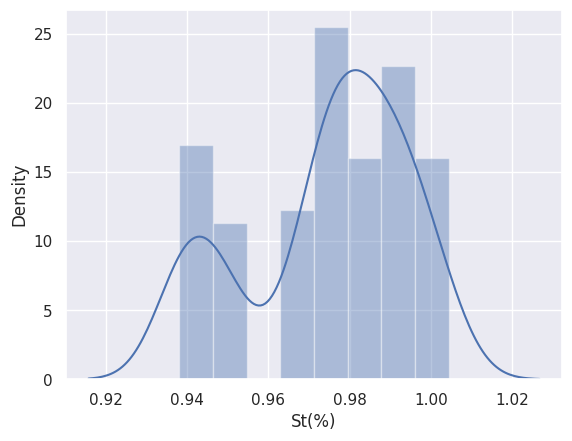

In [153]:
sns.distplot(cp_clean_data['St(%)'])

/tmp/ipykernel_3680811/2488532835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['vol_rel'])


<AxesSubplot: xlabel='vol_rel', ylabel='Density'>

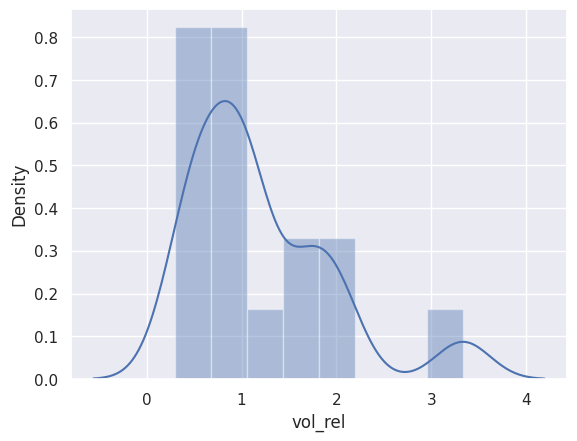

In [154]:
sns.distplot(cp_clean_data['vol_rel'])

##Checking the assumptions!

/tmp/ipykernel_3680811/1709502099.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="vol_rel", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
/home/parmar/Documents/Nirmal-PhD/data_science/microDSC_error_prediction/.venv/lib64/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


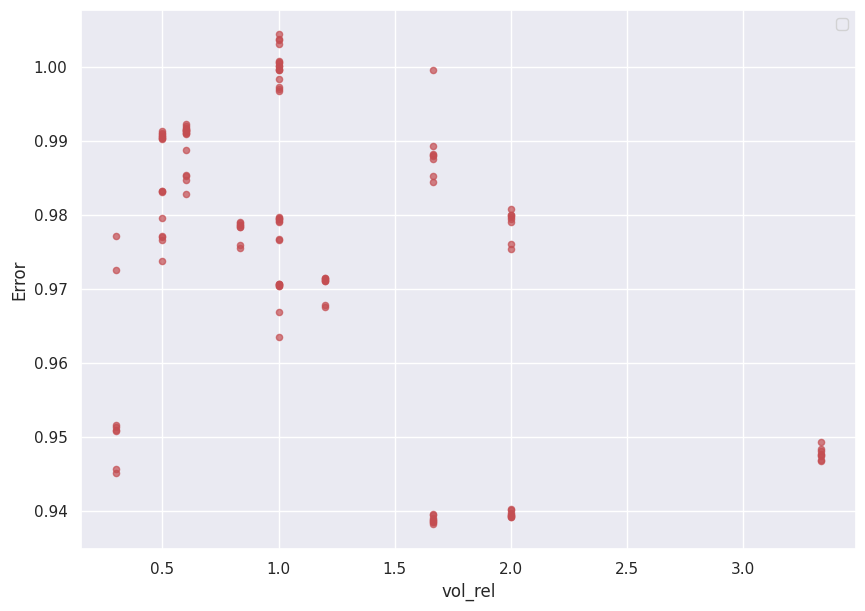

In [155]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="vol_rel", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("vol_rel")
ax1.set_ylabel("Error")
plt.legend()


/tmp/ipykernel_3680811/930513793.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Sam", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


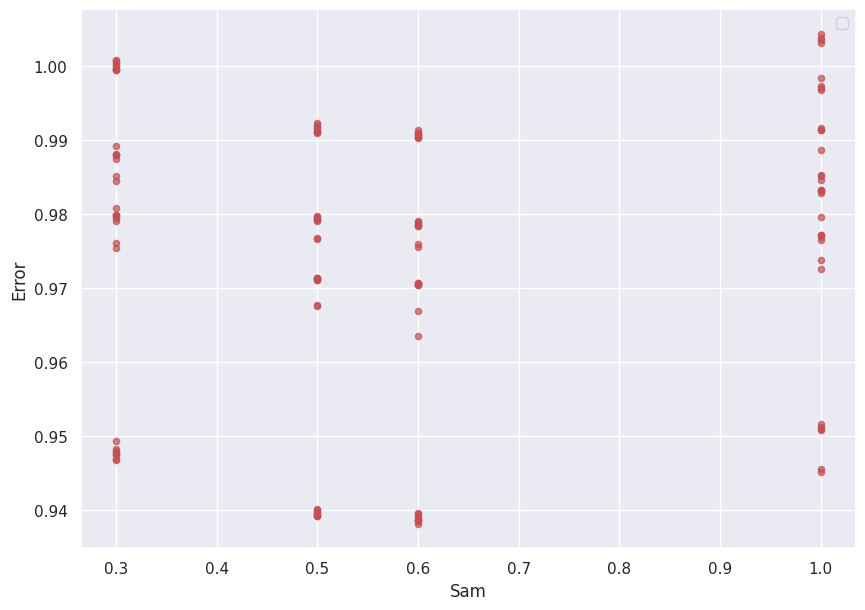

In [156]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Sam", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Sam")
ax1.set_ylabel("Error")
plt.legend()


/tmp/ipykernel_3680811/1676528209.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Ref", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


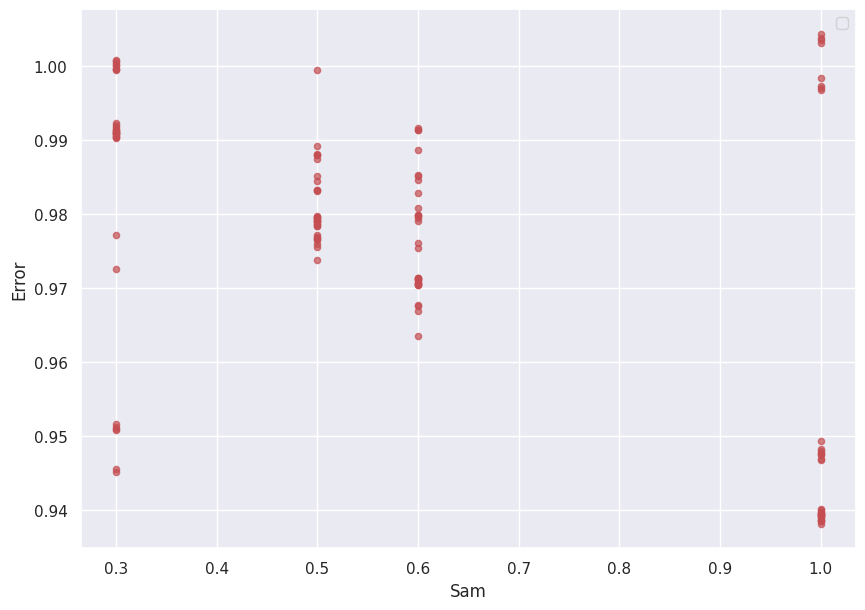

In [157]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Ref", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Sam")
ax1.set_ylabel("Error")
plt.legend()


# Train Test & Target Data

In [158]:
# target data

target = cp_clean_data['St(%)']
vol_data = cp_clean_data[['Ref','Sam','vol_rel']]


In [159]:
# splitting data in train and test sets
from sklearn.model_selection import train_test_split 
vol_train, vol_test, target_train, target_test = train_test_split(vol_data, target, test_size=0.1, random_state= 42)

## Data Pipeline for standardlisation




In [160]:
# creating data pipeline for standardlisation process

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('std_scalar', StandardScaler())
])


In [161]:
# scalling the input data
vol_data_scaled = num_pipline.fit_transform(vol_train)

In [162]:
vol_data_scaled

array([[ 1.50026519,  0.03796626,  0.58906403],
       [-1.21369768,  0.03796626, -0.98320568],
       [ 1.50026519,  1.62564636, -0.3093758 ],
       [-0.05057074,  0.03796626, -0.3093758 ],
       [-0.43827972,  1.62564636, -0.98320568],
       [ 1.50026519,  1.62564636, -0.3093758 ],
       [-0.43827972, -1.15279381,  0.58906403],
       [ 1.50026519, -1.15279381,  2.8351636 ],
       [ 1.50026519, -0.35895376,  1.03828394],
       [-1.21369768, -1.15279381, -0.3093758 ],
       [ 1.50026519, -0.35895376,  1.03828394],
       [-1.21369768, -0.35895376, -0.8484397 ],
       [-0.05057074, -0.35895376, -0.03984385],
       [-0.43827972, -0.35895376, -0.3093758 ],
       [-0.43827972,  1.62564636, -0.98320568],
       [-0.43827972,  1.62564636, -0.98320568],
       [ 1.50026519,  0.03796626,  0.58906403],
       [ 1.50026519,  0.03796626,  0.58906403],
       [-0.05057074, -0.35895376, -0.03984385],
       [ 1.50026519,  1.62564636, -0.3093758 ],
       [ 1.50026519, -1.15279381,  2.835

# ML Model Check PolyReg

In [163]:
# polyreg model fitting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(vol_data_scaled,target_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [164]:
# checking rmse error in fitting
from sklearn.metrics import mean_squared_error
poly_reg_predict = polyreg.predict(vol_data_scaled)
polyreg_mse = mean_squared_error(target_train, poly_reg_predict)
polyreg_rmse = np.sqrt(polyreg_mse)
polyreg_rmse


0.0031381705224871738

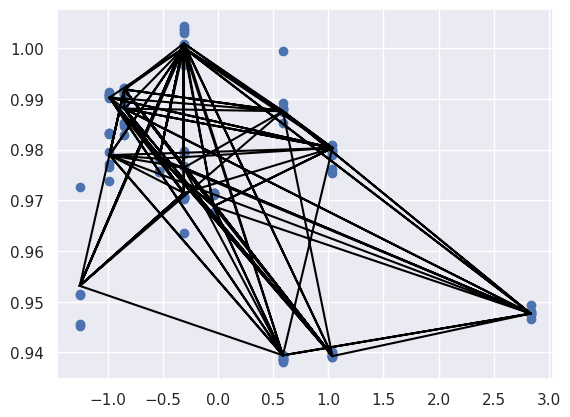

In [165]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(vol_data_scaled[:,2],target_train)
plt.plot(vol_data_scaled[:,2], poly_reg_predict.reshape(-1,1),color='black')
#plt.show()

In [166]:
# cross validation of the polyreg model
from sklearn.model_selection import cross_val_score

plyscores = cross_val_score(polyreg, vol_data_scaled, target_train,
                        scoring="neg_mean_squared_error", cv=5)
polyreg_rmse_scores = np.sqrt(-plyscores)
polyreg_rmse_scores

array([0.00265401, 0.00364545, 0.00390977, 0.00541857, 0.0019593 ])

## ML Model Chek DTR

In [167]:
# Decision tree reg model fitting
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(vol_data_scaled, target_train)

DecisionTreeRegressor()

In [168]:
# checking rmse error of DTR model
from sklearn.metrics import mean_squared_error

err_prediction = tree_reg.predict(vol_data_scaled)
tree_mse = mean_squared_error(target_train, err_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.002949329188006499

## Cross validation

In [169]:
# cross validation of DTR model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, vol_data_scaled, target_train,
                        scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([0.00249943, 0.00336962, 0.00417302, 0.00549714, 0.00194087])

In [170]:
# printing scores of DTR model
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Std Dev:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.00249943 0.00336962 0.00417302 0.00549714 0.00194087]
Mean: 0.0034960154306539993
Std Dev: 0.0012562197016660781


## ML model check RFR

In [171]:
# fitting RFR model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(vol_data_scaled, target_train)

RandomForestRegressor()

In [172]:
# checking rmse error of RFR model
from sklearn.metrics import mean_squared_error

err_prediction = forest_reg.predict(vol_data_scaled)
ftree_mse = mean_squared_error(target_train, err_prediction)
ftree_rmse = np.sqrt(ftree_mse)
ftree_rmse

0.002952320329844099

## Cross Validation 

In [173]:
# cross validation of RFR
from zmq.constants import SocketOption
from sklearn.model_selection import cross_val_score

fscores = cross_val_score(forest_reg, vol_data_scaled, target_train,
                        scoring="neg_mean_squared_error", cv=5)
ftree_rmse_scores = np.sqrt(-fscores)
ftree_rmse_scores

array([0.00254066, 0.00344775, 0.00492628, 0.00527196, 0.0020268 ])

In [174]:
def display_scores(fscores):
  print("Scores:", fscores)
  print("Mean:", fscores.mean())
  print("Std Dev:", fscores.std())

display_scores(ftree_rmse_scores)

Scores: [0.00254066 0.00344775 0.00492628 0.00527196 0.0020268 ]
Mean: 0.0036426909832566455
Std Dev: 0.0012779452967335517


# Test Data Check

### Check PolyReg

In [175]:
vol_test_scaled = num_pipline.transform(vol_test) # data standarlised

In [176]:
polyreg_test_predict = polyreg.predict(vol_test_scaled) # test prediction

poly_rmse = mean_squared_error(target_test, polyreg_test_predict) # error check
poly_rmse = np.sqrt(poly_rmse)
poly_rmse

0.007085684499079345

### check DTR

In [177]:
dtr_test_predict = tree_reg.predict(vol_test_scaled) # tests prediction
 
tree_mse = mean_squared_error(target_test, dtr_test_predict) # error check
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.007024266771948939

### Check RFR

In [178]:
rfr_test_predict = forest_reg.predict(vol_test_scaled)

ftree_mse = mean_squared_error(target_test, rfr_test_predict)
ftree_rmse = np.sqrt(ftree_mse)
ftree_rmse

0.006934567367029232

In [179]:
prediction = pd.DataFrame(dtr_test_predict)
target_test.index = prediction.index
pred_accu = (target_test / prediction) * 100

result = pd.concat([target_test, prediction, pred_accu.iloc[:,0]], axis=1, ignore_index=True)
result.columns = ['Target', 'Predictions', 'Pred-Accu-(%)']
result

,Target,Predictions,Pred-Accu-(%)
0,0.976922,0.979504,99.736350
1,0.971013,0.970243,100.688421
2,0.946806,0.947834,103.068936
3,0.966855,0.969516,100.763835
4,0.990911,0.990698,98.609442
5,0.977105,0.953207,102.487945
6,0.979440,0.978512,99.837548
7,0.991350,0.987075,98.971406
8,0.984452,0.989357,98.743149
9,0.950768,0.953207,102.487945


Text(0.5, 0, 'Targets (red) & Predictions (blue)')

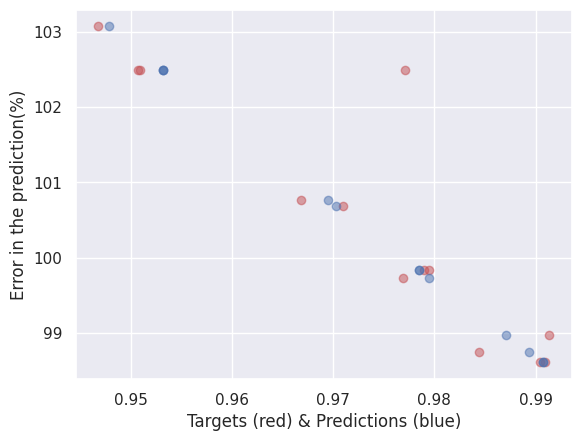

In [180]:
import matplotlib.pyplot as plt
plt.scatter(result['Target'], result['Pred-Accu-(%)'], alpha=0.5, color='r')
plt.scatter(result['Predictions'], result['Pred-Accu-(%)'],alpha=0.5, color='b')
plt.ylabel('Error in the prediction(%)')
plt.xlabel('Targets (red) & Predictions (blue)')

Text(0.5, 0, 'Targets')

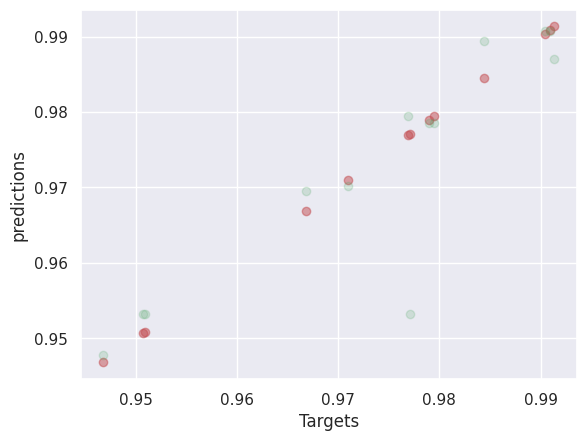

In [181]:
plt.scatter(result['Target'], result['Target'], alpha=0.5, color='r')
plt.scatter(result['Target'], result['Predictions'], alpha=0.2, color='g')

plt.ylabel('predictions')
plt.xlabel('Targets')

In [182]:
# estimation of R2 score
from sklearn.metrics import r2_score
r2_score_test = r2_score(target_test, prediction)
np.round(r2_score_test,4)

0.7795

In [183]:
# estimation of adjusted R2 score
n = np.size(target_test)
k = 3 # number of features
adj_r2_score = 1 - (((1-r2_score_test)*(n-1))/((n-k-1)))
np.round(adj_r2_score,4)

0.706

In [184]:
mean_pred = pred_accu.mean()
std_pred = pred_accu.std()
uncertainty_model = std_pred
print("Uncertainty of the ANN model:", np.round(uncertainty_model[0],2), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model[0],2), '[%]')

Uncertainty of the ANN model: 1.65 [%]
Average test prediction precision 98.35 [%]


DecisionTreeRegressor is working better.

DTR is able to predicit an error that occures in heat capacity measurement due to inapropriate selection of sample and reference amount in the batch cell

In [185]:

from scipy import stats
confidence = 0.95
squared_error = (prediction - target_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_error) - 1,
                         loc=squared_error.mean(), 
                         scale=stats.sem(squared_error)))


array([[0.00908842,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [0.02054988,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan]])

## Model Deployment

In [186]:
import joblib

In [187]:
joblib.dump(tree_reg,'dsc_error_dtr.pkl') # DTR model pkl

['dsc_error_dtr.pkl']

In [188]:
joblib.dump(num_pipline,'scaler.pkl') #scaler for standarlisation model pkl

['scaler.pkl']